In [16]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [17]:
# reading csv and convering to dataframe
df1 = pd.read_csv('..\data\possum.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


## Bsic Pre-Processing

In [18]:
# clearing null values
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [19]:
# check for unique values
df1['case'].nunique()
df1.drop(columns=['case'], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      101 non-null    int64  
 1   Pop       101 non-null    object 
 2   sex       101 non-null    object 
 3   age       101 non-null    float64
 4   hdlngth   101 non-null    float64
 5   skullw    101 non-null    float64
 6   totlngth  101 non-null    float64
 7   taill     101 non-null    float64
 8   footlgth  101 non-null    float64
 9   earconch  101 non-null    float64
 10  eye       101 non-null    float64
 11  chest     101 non-null    float64
 12  belly     101 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.0+ KB


In [20]:
# renaming columns
renames = {'Pop': 'population', 'hdlngth': 'head_len', 'skullw': 'skull_width', 'totlngth': 'total_len', 'taill': 'tail_len', 'footlgth': 'foot_len', 'earconch': 'ear_conch_len', 'chest': 'chest_girth', 'belly': 'belly_girth'}

for col in renames:
    df1.rename({col:renames[col]}, axis=1, inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site           101 non-null    int64  
 1   population     101 non-null    object 
 2   sex            101 non-null    object 
 3   age            101 non-null    float64
 4   head_len       101 non-null    float64
 5   skull_width    101 non-null    float64
 6   total_len      101 non-null    float64
 7   tail_len       101 non-null    float64
 8   foot_len       101 non-null    float64
 9   ear_conch_len  101 non-null    float64
 10  eye            101 non-null    float64
 11  chest_girth    101 non-null    float64
 12  belly_girth    101 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.0+ KB


## Understanding Data by Plotting

In [22]:
print(df1.nunique())

site              7
population        2
sex               2
age               9
head_len         70
skull_width      63
total_len        33
tail_len         19
foot_len         75
ear_conch_len    67
eye              35
chest_girth      19
belly_girth      24
dtype: int64


In [28]:
def plot_bar_graph(x: str, y: str)->None:
    plt.bar(df1[x], df1[y], width=0.3)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(x + ' vs ' + y)
    plt.show()

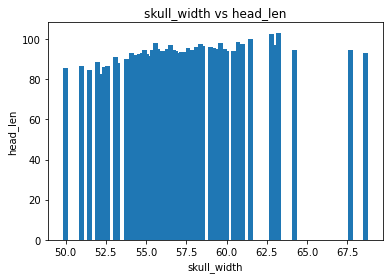

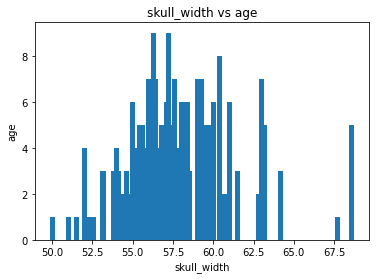

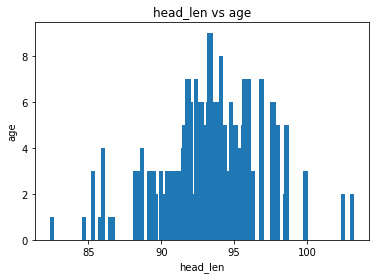

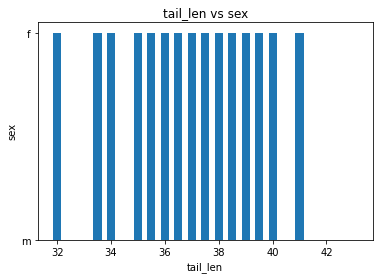

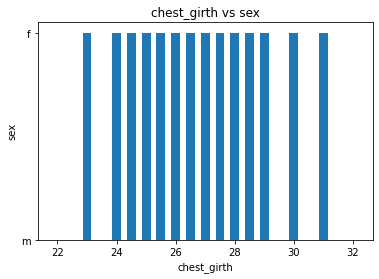

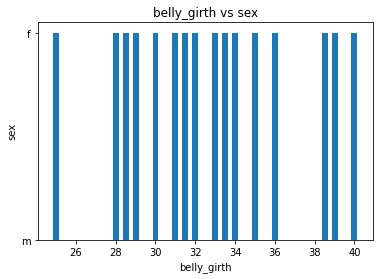

In [30]:
# plot skull_width (x) vs head_len (y)
plot_bar_graph('skull_width', 'head_len')
# plot skull_width (x) vs age (y)
plot_bar_graph('skull_width', 'age')
# plot head_len (x) vs age (y)
plot_bar_graph('head_len', 'age')
# plot tail_len (x) vs sex (y)
plot_bar_graph('tail_len', 'sex')
# plot chest_girth (x) vs sex (y)
plot_bar_graph('chest_girth', 'sex')
# plot belly_girth (x) vs sex (y)
plot_bar_graph('belly_girth', 'sex')

In [56]:
# counts 
sex_cnt = df1['sex'].value_counts()
ages = df1['age'].value_counts()
pop_cnt = df1['population'].value_counts()

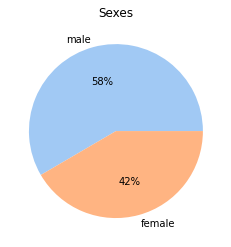

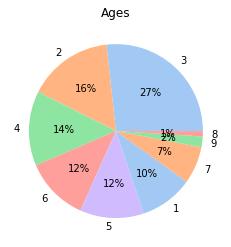

AttributeError: 'Text' object has no property 'colors'

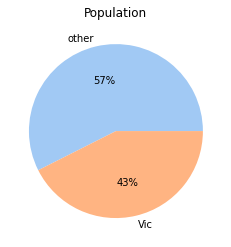

In [59]:
#define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:5]

#create pie chart for sex
plt.pie(sex_cnt, labels = ['male', 'female'], colors = colors, autopct='%.0f%%')
plt.title('Sexes')
plt.show()

#create pie chart for age
plt.pie(ages, labels = [3, 2, 4, 6, 5, 1, 7, 9, 8], colors = colors, autopct='%.0f%%')
plt.title('Ages')
plt.show()
#create pie chart for population
plt.pie(pop_cnt, labels = ['other', 'Vic'], colors = colors, autopct='%.0f%%')
plt.title('Population')
plt.show()

## converting to csv

In [60]:
df1.to_csv('..\data\possom_final.csv')